In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('D:/ict/titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column


In [4]:
data=data.set_index('PassengerId')

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [9]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

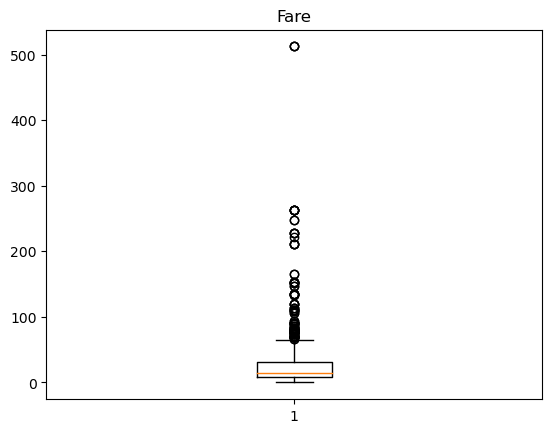

In [11]:
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

In [12]:
q1=np.percentile(data['Fare'],25)
q2=np.percentile(data['Fare'],50)
q3=np.percentile(data['Fare'],75)

In [13]:
IQR= q3-q1
lowerlimit=q1-1.5*IQR
upprlimit=q3+1.5*IQR

In [14]:
upprlimit

65.6344

In [15]:
outlier=[]
for x in data['Fare']:
    if ((x>upprlimit)or (x<lowerlimit)):
        outlier.append(x)

In [16]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [17]:
ind=data['Fare']>upprlimit
m=data.loc[ind].index

In [18]:
data=data.drop(m)

<AxesSubplot:>

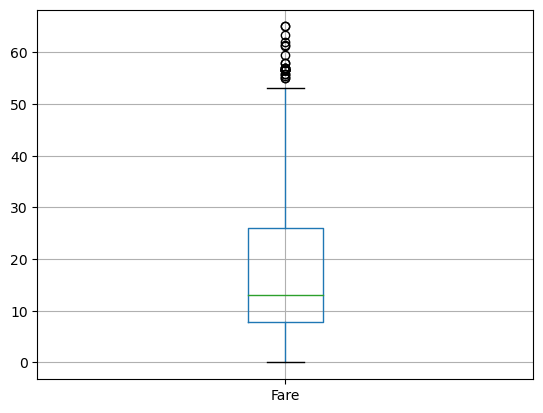

In [19]:
data.boxplot('Fare')

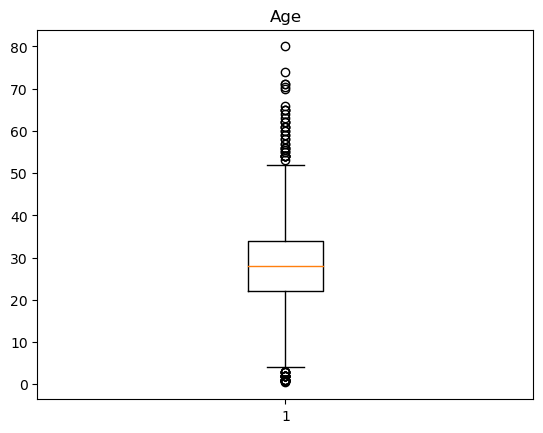

In [20]:
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [21]:
q1=np.percentile(data['Age'],25)
q2=np.percentile(data['Age'],50)
q3=np.percentile(data['Age'],75)

In [22]:
IQR= q3-q1
lowerlimit=q1-1.5*IQR
upprlimit=q3+1.5*IQR

In [23]:
outlier=[]
for x in data['Age']:
    if ((x>upprlimit)or (x<lowerlimit)):
        outlier.append(x)

In [24]:
ind=data['Age']>upprlimit
k=data['Age']<lowerlimit
m=data.loc[ind].index
n=data.loc[k].index

In [25]:
data=data.drop(m)
data=data.drop(n)

<AxesSubplot:>

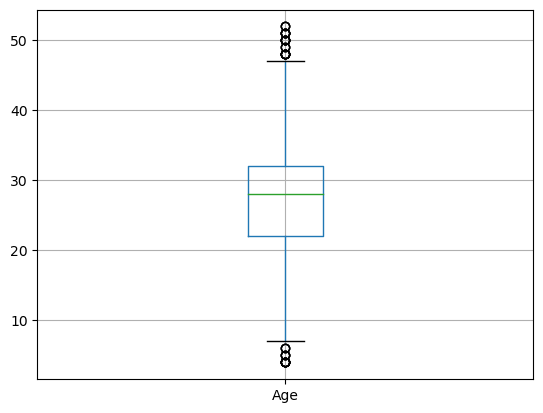

In [26]:
data.boxplot('Age')

<AxesSubplot:>

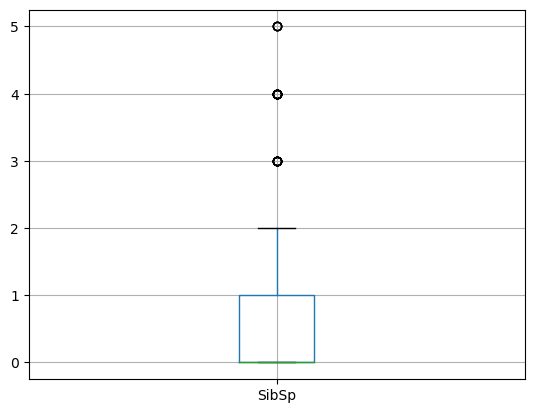

In [27]:
data.boxplot('SibSp')

In [28]:
q1=np.percentile(data['SibSp'],25)
q2=np.percentile(data['SibSp'],50)
q3=np.percentile(data['SibSp'],75)

In [29]:
IQR= q3-q1
lowerlimit=q1-1.5*IQR
upprlimit=q3+1.5*IQR

In [30]:
outlier=[]
for x in data['SibSp']:
    if ((x>upprlimit)or (x<lowerlimit)):
        outlier.append(x)

In [31]:
ind=data['SibSp']>upprlimit
m=data.loc[ind].index

In [32]:
data=data.drop(m)


<AxesSubplot:>

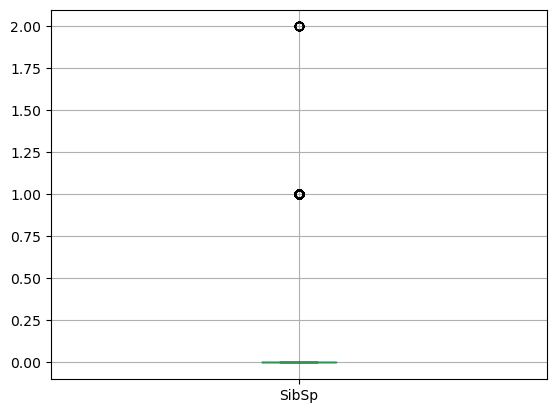

In [33]:
data.boxplot('SibSp')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [34]:
y=data['Survived']

In [35]:
x=data.drop(['Survived','Name'],axis=1)    

In [36]:
x


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,B96 B98,S
6,3,male,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,female,19.0,0,0,112053,30.0000,B42,S
889,3,female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

x['Sex']=labelencoder.fit_transform(x['Sex'])
x['Ticket']=labelencoder.fit_transform(x['Ticket'])
x['Cabin']=labelencoder.fit_transform(x['Cabin'])
x['Embarked']=labelencoder.fit_transform(x['Embarked'])

In [38]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
x1=x.drop(['Sex'],axis=1)
x1

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,22.0,1,0,462,7.2500,21,2
3,3,26.0,0,0,582,7.9250,21,2
4,1,35.0,1,0,34,53.1000,27,2
5,3,35.0,0,0,415,8.0500,21,2
6,3,28.0,0,0,230,8.4583,21,1
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,66,13.0000,21,2
888,1,19.0,0,0,10,30.0000,16,2
889,3,28.0,1,2,588,23.4500,21,2


In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [41]:
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7
0,1.0,0.375000,0.5,0.000000,0.780405,0.111538,0.291667,1.0
1,1.0,0.458333,0.0,0.000000,0.983108,0.121923,0.291667,1.0
2,0.0,0.645833,0.5,0.000000,0.057432,0.816923,0.375000,1.0
3,1.0,0.645833,0.0,0.000000,0.701014,0.123846,0.291667,1.0
4,1.0,0.500000,0.0,0.000000,0.388514,0.130128,0.291667,0.5
...,...,...,...,...,...,...,...,...
676,0.5,0.479167,0.0,0.000000,0.111486,0.200000,0.291667,1.0
677,0.0,0.312500,0.0,0.000000,0.016892,0.461538,0.222222,1.0
678,1.0,0.500000,0.5,0.333333,0.993243,0.360769,0.291667,1.0
679,0.0,0.458333,0.0,0.000000,0.006757,0.461538,0.430556,0.0


In [42]:
x=x.drop([ 'Pclass','Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin', 'Embarked'],axis=1)

In [43]:
x=pd.concat([x,x1],axis=1)
x.columns=['Sex', 'Pclass','Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin', 'Embarked']

In [46]:
x

,Sex,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1.0,1.0,0.458333,0.0,0.000000,0.983108,0.121923,0.291667,1.0
3,0.0,1.0,0.645833,0.0,0.000000,0.701014,0.123846,0.291667,1.0
4,0.0,1.0,0.500000,0.0,0.000000,0.388514,0.130128,0.291667,0.5
5,1.0,1.0,0.479167,0.0,0.333333,0.498311,0.171282,0.291667,1.0
6,1.0,0.5,0.208333,0.5,0.000000,0.160473,0.462628,0.291667,0.0
...,...,...,...,...,...,...,...,...,...
660,NaN,1.0,0.000000,0.5,0.166667,0.498311,0.171282,0.291667,1.0
661,NaN,1.0,0.458333,0.0,0.000000,0.570946,0.121474,0.291667,1.0
666,NaN,1.0,0.229167,0.0,0.000000,0.261824,0.111154,0.291667,0.0
673,NaN,0.5,0.500000,0.0,0.000000,0.847973,0.161538,0.291667,1.0
